<a href="https://colab.research.google.com/github/namrathareddy-17/Predictive-Analysis-/blob/credit_card_hypertuning/Creditcard_hypertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution:
Class
0.0    201715
1.0       387
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60515
         1.0       0.81      0.71      0.76       116

    accuracy                           1.00     60631
   macro avg       0.91      0.85      0.88     60631
weighted avg       1.00      1.00      1.00     60631

Confusion Matrix:
[[60496    19]
 [   34    82]]


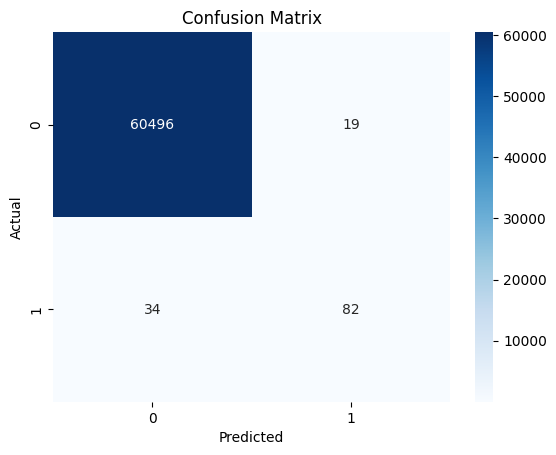

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('creditcard.csv')

# Drop rows with NaN in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Check class balance
print("Class distribution:")
print(df['Class'].value_counts())

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Scale features
X = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'class_weight': ['balanced']
}

model = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=3)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Results
print("Best Parameters:", model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9994382219725431

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.70      0.81       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

